In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
data = pd.read_csv('employee_attrition_balanced_30000.csv')
data.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,5394,53,Female,Single,Marketing,Assistant,1,9442,76,25,...,Yes,5,58,3,3,2,4,43,3,Yes
1,5191,45,Male,Divorced,Marketing,Manager,5,17616,37,28,...,No,4,45,15,1,1,1,47,2,No
2,8614,30,Female,Divorced,Sales,Analyst,4,14804,84,4,...,Yes,2,59,12,3,1,3,7,1,Yes
3,1964,40,Male,Married,Marketing,Assistant,4,9110,97,4,...,No,6,36,9,2,1,1,36,2,No
4,3151,27,Female,Divorced,HR,Analyst,2,11801,48,24,...,Yes,2,32,8,2,2,2,45,2,No


In [4]:
# Drop ID
data = data.drop(['Employee_ID'], axis=1)

# Encode 'Yes'/'No' to 1/0
data['Overtime'] = data['Overtime'].map({'Yes': 1, 'No': 0})
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical features
data = pd.get_dummies(data, drop_first=True)

# Split features and label
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.5096 - loss: 0.7065 - val_accuracy: 0.5217 - val_loss: 0.6918
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.5086 - loss: 0.6929 - val_accuracy: 0.5500 - val_loss: 0.6894
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.5356 - loss: 0.6895 - val_accuracy: 0.5563 - val_loss: 0.6873
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.5387 - loss: 0.6863 - val_accuracy: 0.5617 - val_loss: 0.6841
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.5517 - loss: 0.6822 - val_accuracy: 0.5603 - val_loss: 0.6808
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.5690 - loss: 0.6759 - val_accuracy: 0.5847 - val_loss: 0.6720
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.5945 - loss: 0.6664 - val_accuracy: 0.6017 - val_loss: 0.6624
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.6008 - loss: 0.6617 - 

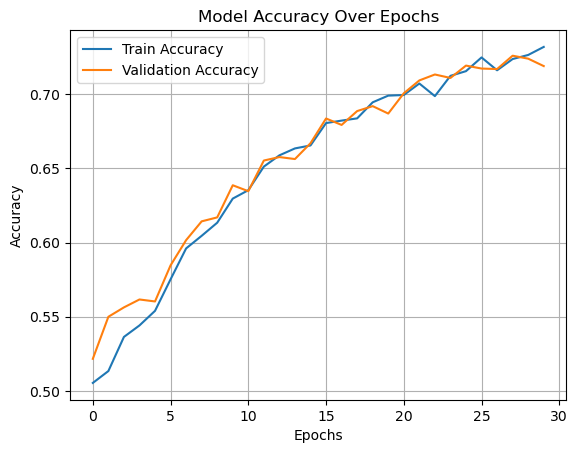

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7257 - loss: 0.5489
Test Accuracy: 71.90%


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


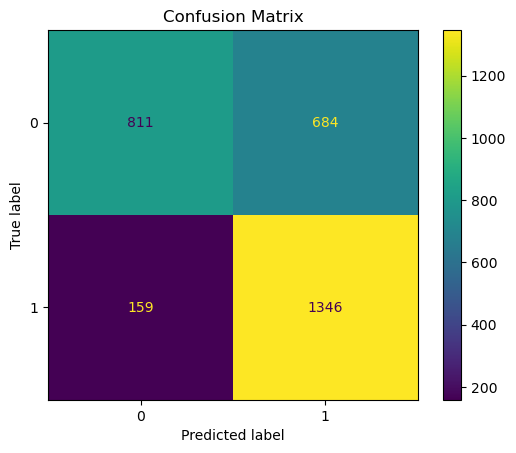

In [10]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.54      0.66      1495
           1       0.66      0.89      0.76      1505

    accuracy                           0.72      3000
   macro avg       0.75      0.72      0.71      3000
weighted avg       0.75      0.72      0.71      3000



94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step


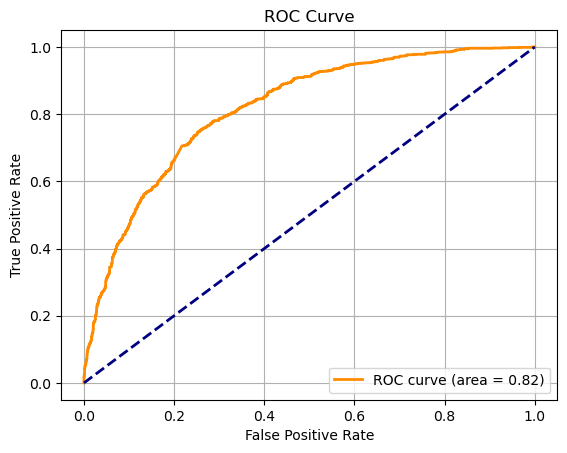

In [12]:
y_prob = model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [13]:
model.save("attrition_model.h5")